## MULTICLASS CLASSIFICATION FOR MUSIC GENRES

### 1. Data Exploration

In [44]:
# basics
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

# feature selection
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

# models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# evaluation
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split

# performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter

In [45]:
path = "./music30s_trainin.csv"
df = pd.read_csv(path, delimiter=",", index_col=0)
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,661504,0.432846,0.086019,0.142929,0.004758,3089.637185,1.311379e+06,2973.703815,271609.298651,6574.771380,...,-4.922164,106.523758,-5.005428,74.781494,1.383756,75.593880,-2.103029,82.962410,-2.102471,56.383205
1,661504,0.398761,0.090296,0.092221,0.001716,2170.544505,2.470449e+05,2054.465986,111598.068567,4306.240937,...,5.730653,62.366760,-7.947048,57.781807,5.203198,71.078148,-1.486348,55.774078,0.463148,60.979748
2,661794,0.375874,0.081557,0.099977,0.001147,2321.871533,5.433791e+05,2545.325000,155899.829366,4580.418732,...,-0.442143,51.811581,-3.584000,51.066288,-5.018315,47.032211,-2.522085,35.879490,-4.752133,33.392231
3,661794,0.424385,0.085162,0.175975,0.003569,1886.954809,2.533910e+05,1913.258610,123441.419116,3828.288761,...,0.975607,48.149387,-6.554968,35.716187,-0.689079,46.263088,-2.127222,47.571030,-1.508367,50.199821
4,661794,0.456134,0.075901,0.097609,0.000364,2269.128009,1.357942e+05,1928.953538,88450.196573,4186.459372,...,6.971109,40.836742,-12.668804,40.830875,-0.556885,31.079792,-11.754225,37.405830,-1.540814,30.325340


In [46]:
class_label_path = "music30s_trainlabel.csv"
class_label = pd.read_csv(class_label_path, delimiter=",", index_col=0)
class_label.head()

,label
0,reggae
1,reggae
2,country
3,blues
4,metal


In [47]:
class_label.label.unique()

array(['reggae', 'country', 'blues', 'metal', 'rock', 'jazz', 'pop',
       'hiphop', 'classical', 'disco'], dtype=object)

In [48]:
class_label.label.nunique()

10

In [49]:
df["label"] = class_label
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,661504,0.432846,0.086019,0.142929,0.004758,3089.637185,1.311379e+06,2973.703815,271609.298651,6574.771380,...,106.523758,-5.005428,74.781494,1.383756,75.593880,-2.103029,82.962410,-2.102471,56.383205,reggae
1,661504,0.398761,0.090296,0.092221,0.001716,2170.544505,2.470449e+05,2054.465986,111598.068567,4306.240937,...,62.366760,-7.947048,57.781807,5.203198,71.078148,-1.486348,55.774078,0.463148,60.979748,reggae
2,661794,0.375874,0.081557,0.099977,0.001147,2321.871533,5.433791e+05,2545.325000,155899.829366,4580.418732,...,51.811581,-3.584000,51.066288,-5.018315,47.032211,-2.522085,35.879490,-4.752133,33.392231,country
3,661794,0.424385,0.085162,0.175975,0.003569,1886.954809,2.533910e+05,1913.258610,123441.419116,3828.288761,...,48.149387,-6.554968,35.716187,-0.689079,46.263088,-2.127222,47.571030,-1.508367,50.199821,blues
4,661794,0.456134,0.075901,0.097609,0.000364,2269.128009,1.357942e+05,1928.953538,88450.196573,4186.459372,...,40.836742,-12.668804,40.830875,-0.556885,31.079792,-11.754225,37.405830,-1.540814,30.325340,metal


In [50]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,9.000000e+02,900.000000,900.000000,900.000000,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,662058.222222,0.380049,0.086202,0.131305,0.003023,2206.387756,4.672791e+05,2245.030187,136337.966864,4581.474236,...,1.214874,60.629056,-4.006116,62.522815,0.521777,63.796115,-2.325727,66.654286,-1.049838,70.270442
std,1857.249152,0.082248,0.007699,0.065683,0.003610,716.718035,4.001082e+05,525.930914,95979.506540,1575.246664,...,4.510371,34.243255,4.493173,33.799503,3.827148,34.526920,3.728667,37.893853,3.837944,45.892129
min,660000.000000,0.171939,0.044555,0.006629,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,15.007277,-11.963694,16.564707,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.321153,0.082263,0.087418,0.000937,1621.413022,1.874965e+05,1924.396266,67468.932262,3398.197169,...,-1.691719,40.286901,-7.207225,40.449431,-1.878786,41.930823,-4.623938,41.816311,-3.375378,42.372865
50%,661794.000000,0.385824,0.086537,0.120715,0.001806,2224.024109,3.381147e+05,2221.392843,111679.047288,4681.106858,...,1.381382,52.209917,-4.128582,54.708273,0.680630,54.276781,-2.393862,57.454914,-1.125176,59.186117
75%,661794.000000,0.437752,0.091194,0.175726,0.003570,2702.689540,6.001169e+05,2578.469836,180282.345958,5537.472187,...,4.395688,70.715445,-0.905199,74.109550,3.077287,75.653149,0.140751,78.731144,1.335365,85.216187
max,675808.000000,0.663685,0.104077,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.016836,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


In [51]:
df.groupby("label").size()

label
blues        86
classical    89
country      91
disco        89
hiphop       91
jazz         89
metal        91
pop          88
reggae       91
rock         95
dtype: int64

In [52]:
df.isnull().values.any()

False

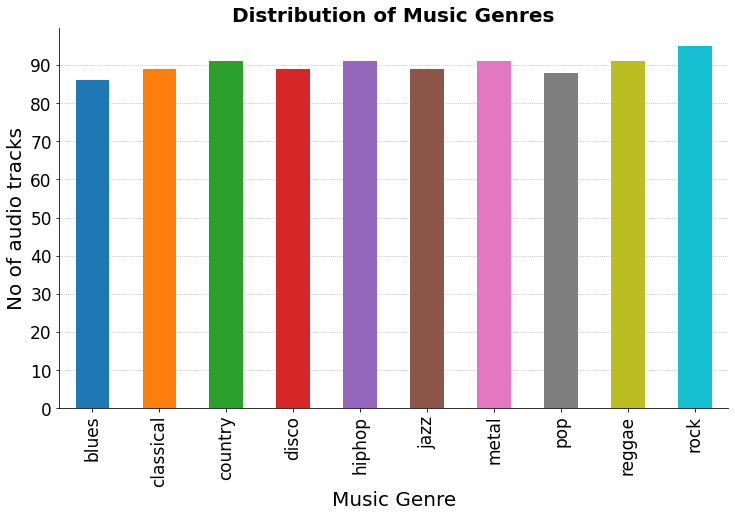

In [109]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
          
fig, ax = plt.subplots(figsize=(12,7))

df.groupby("label").size().plot(kind='bar', color=colors)

plt.title('Distribution of Music Genres', fontsize=20, fontweight='bold')
plt.xlabel('Music Genre', fontsize=20)
plt.ylabel('No of audio tracks', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(np.arange(0, 100, 10), fontsize=17)

# ax.set_facecolor('#d3d3d3')
ax.set_axisbelow(True)
ax.yaxis.grid(linestyle='dotted')

# ax.spines['bottom'].set_visible(True)
# ax.spines['bottom'].color('black')
# ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.grid(False)
# plt.savefig('fig1.png')
plt.show()

### 2. Feature Selection

#### 2(a) chi2

No of selected features=  35


,mfcc9_var,mfcc9_mean,mfcc8_var,mfcc8_mean,mfcc7_var,mfcc7_mean,mfcc6_var,mfcc6_mean,mfcc5_var,mfcc5_mean,...,rolloff_var,rolloff_mean,spectral_bandwidth_var,spectral_bandwidth_mean,spectral_centroid_var,spectral_centroid_mean,rms_var,rms_mean,chroma_stft_var,chroma_stft_mean
0,0.476388,0.502755,0.328140,0.388729,0.427275,0.529931,0.459969,0.342753,0.344795,0.734918,...,0.537232,0.734768,0.381320,0.794782,0.430339,0.651867,0.171782,0.348285,0.696619,0.530572
1,0.268261,0.581706,0.260012,0.492926,0.300131,0.596990,0.270766,0.586806,0.308558,0.417733,...,0.121256,0.448646,0.147385,0.442797,0.078950,0.414080,0.061847,0.218712,0.768463,0.461259
2,0.217363,0.334327,0.207622,0.369931,0.137702,0.757648,0.406921,0.289408,0.186141,0.851049,...,0.304979,0.483227,0.212154,0.630752,0.176784,0.453231,0.041302,0.238531,0.621645,0.414717
3,0.157853,0.461603,0.240961,0.636384,0.320550,0.335906,0.319301,0.747780,0.257785,0.579300,...,0.142536,0.388363,0.164700,0.388727,0.081045,0.340710,0.128805,0.432729,0.682207,0.513368
4,0.083391,0.247673,0.155329,0.649391,0.216963,0.488792,0.192338,0.696309,0.060355,0.474025,...,0.082329,0.433538,0.113543,0.394737,0.042220,0.439586,0.013004,0.232481,0.526624,0.577931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.263311,0.713910,0.212274,0.543885,0.312808,0.484457,0.354420,0.610608,0.148966,0.789592,...,0.411162,0.636656,0.313984,0.680837,0.444286,0.594585,0.298530,0.351690,0.710381,0.605883
896,0.170337,0.650991,0.208902,0.353839,0.180033,0.722154,0.370528,0.448947,0.145678,0.807684,...,0.095250,0.188459,0.039335,0.216402,0.043180,0.139530,0.112336,0.211031,0.781566,0.242037
897,0.358260,0.686040,0.284362,0.296958,0.451883,0.770914,0.532069,0.360669,0.233249,0.690191,...,0.412795,0.740006,0.308484,0.793459,0.310077,0.660537,0.471531,0.554350,0.704038,0.575106
898,0.238038,0.756569,0.326396,0.315548,0.210411,0.892571,0.469426,0.492583,0.211613,0.899725,...,0.553104,0.410446,0.436811,0.621844,0.243448,0.323781,0.493469,0.629269,0.842817,0.540919


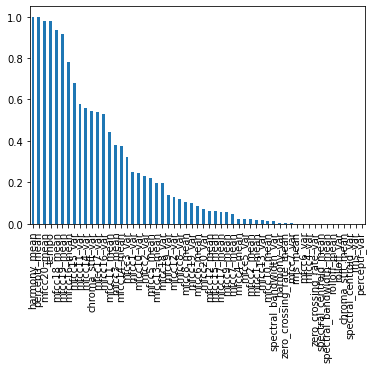

In [54]:
# MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) # scales between -1 and 1
df_numpy = df.iloc[:,1:-1].to_numpy() # exclude length and labels
df_numpy = scaler.fit_transform(df_numpy)
features = list(df.iloc[:,1:-1].columns)
df_scaled = pd.DataFrame(df_numpy, columns=features)


X = df_scaled
y = df.iloc[:,-1]
chi_scores = chi2(X,y)
# chi_scores
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()


imp_values = []
for item in p_values:
    if item >= 0.04:
        imp_values.append(item)
indices = np.argsort(imp_values)
selected_features_chi2 = df_scaled.columns[indices]
print("No of selected features= ",len(selected_features_chi2))
df_chi2 = scaler.fit_transform(df_scaled[selected_features_chi2])
df_chi2 = pd.DataFrame(df_chi2, columns=selected_features_chi2)
df_chi2

#### 2(b) Decision Tree for Feature Selection

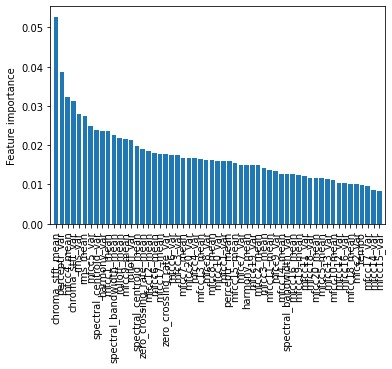

<Figure size 864x504 with 0 Axes>

No of selected features=  14


,spectral_bandwidth_var,harmony_var,spectral_bandwidth_mean,spectral_centroid_var,zero_crossing_rate_mean,rolloff_mean,spectral_centroid_mean,harmony_mean,rms_mean,rms_var,chroma_stft_var,zero_crossing_rate_var,rolloff_var,chroma_stft_mean
0,0.381320,0.104326,0.794782,0.430339,0.452524,0.734768,0.651867,0.633845,0.348285,0.171782,0.696619,0.259804,0.537232,0.530572
1,0.147385,0.054096,0.442797,0.078950,0.388623,0.448646,0.414080,0.585224,0.218712,0.061847,0.768463,0.075289,0.121256,0.461259
2,0.212154,0.058729,0.630752,0.176784,0.326838,0.483227,0.453231,0.633921,0.238531,0.041302,0.621645,0.087617,0.304979,0.414717
3,0.164700,0.166122,0.388727,0.081045,0.269804,0.388363,0.340710,0.633792,0.432729,0.128805,0.682207,0.051991,0.142536,0.513368
4,0.113543,0.048688,0.394737,0.042220,0.457238,0.433538,0.439586,0.595659,0.232481,0.013004,0.526624,0.036273,0.082329,0.577931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.313984,0.157937,0.680837,0.444286,0.430785,0.636656,0.594585,0.633901,0.351690,0.298530,0.710381,0.339010,0.411162,0.605883
896,0.039335,0.078207,0.216402,0.043180,0.118610,0.188459,0.139530,0.633680,0.211031,0.112336,0.781566,0.045169,0.095250,0.242037
897,0.308484,0.218476,0.793459,0.310077,0.478088,0.740006,0.660537,0.633940,0.554350,0.471531,0.704038,0.299222,0.412795,0.575106
898,0.436811,0.492778,0.621844,0.243448,0.117938,0.410446,0.323781,0.633887,0.629269,0.493469,0.842817,0.063664,0.553104,0.540919


In [55]:
X = df_scaled
y = df.iloc[:,-1] # only labels
X_train,X_test,y_train,y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=99,
    stratify=y)


forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.ylabel('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')
feat_labels = df_scaled.columns
plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.figure(figsize=(12,7))
plt.show()


imp_values = []
for item in importances:
    if item >= 0.02:
        imp_values.append(item)
indices = np.argsort(imp_values)
selected_features_dt = df_scaled.columns[indices]
print("No of selected features= ",len(selected_features_dt))
df_decision_tree = scaler.fit_transform(df[selected_features_dt])
df_decision_tree = pd.DataFrame(df_decision_tree, columns=selected_features_dt)
df_decision_tree

#### 2(c) PCA (Dimensionality Reduction)

In [56]:
# Reducing the dimensions of the data
pca = PCA(n_components = 30)
df_principal = pca.fit_transform(df_scaled)
df_principal = pd.DataFrame(df_principal)
df_principal

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.918421,0.315129,0.268345,-0.258330,0.350921,-0.196147,0.135572,-0.044342,0.079609,0.054850,...,-0.119516,0.065558,-0.082714,0.008804,0.029543,-0.008518,0.032281,-0.017529,-0.045510,0.014380
1,0.120172,-0.088426,0.008693,0.281627,-0.126401,-0.064476,0.381967,0.133717,-0.086207,0.010519,...,0.096321,-0.004792,-0.053199,0.007463,0.083494,0.052541,0.012670,0.291353,0.033398,0.066506
2,0.377901,-0.059108,-0.196449,-0.236845,0.034072,-0.144633,0.052269,-0.096847,-0.151716,0.041548,...,-0.246842,0.006132,0.010270,-0.114135,0.135048,-0.066418,0.103492,-0.055366,-0.001272,-0.052008
3,-0.257504,0.018819,0.266192,-0.187354,-0.186555,0.194333,0.136905,-0.149759,-0.126290,-0.040152,...,-0.048040,-0.124816,-0.098591,0.039629,-0.023428,-0.012756,-0.039085,-0.000874,-0.182087,-0.037795
4,-0.795645,0.109122,0.003193,-0.183776,0.000925,-0.118151,0.142581,-0.014102,-0.108156,0.103200,...,0.089162,-0.057395,0.079308,-0.064096,0.026767,0.030025,0.055598,0.029152,-0.032216,0.008613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.559614,0.442109,0.135704,0.140096,-0.058570,-0.175050,0.007558,0.160237,0.178765,-0.065124,...,0.044344,0.115561,-0.120699,0.001868,0.074125,-0.013769,-0.142573,0.096161,-0.034873,-0.003049
896,0.318389,-0.694730,-0.029206,0.170929,-0.360117,0.128241,0.147321,-0.178255,-0.282449,-0.225875,...,0.103875,0.123147,0.009719,0.131400,-0.219572,0.025983,0.029519,0.109744,-0.086485,0.034978
897,0.849730,0.618177,0.127985,-0.139517,0.108866,0.193076,0.152846,-0.117349,0.025780,0.010610,...,0.051526,-0.039658,0.089894,-0.020300,0.084021,0.019343,0.071585,-0.029337,-0.067594,0.167971
898,0.838273,0.149879,0.019021,-0.289761,-0.514451,0.389306,-0.180781,-0.025870,-0.000829,0.119265,...,0.221726,0.153289,-0.028801,-0.002028,0.051203,-0.077787,-0.025122,0.085093,-0.121447,0.051147


### 3. Model Performance
- Model training
- Model evaluation (GridSearchCV)
- Accuracy Improvement

#### Model training with selected features

In [57]:
# # MinMaxScaler
# scaler = MinMaxScaler(feature_range=(-1, 1)) # scales between -1 and 1
# df_numpy = df.iloc[:,1:-1].to_numpy() # exclude length and labels
# df_numpy = scaler.fit_transform(df_numpy)
# features = list(df.iloc[:,1:-1].columns)
# df_scaled = pd.DataFrame(df_numpy, columns=features)

# # StandardScaler()
# scaler = StandardScaler()
# df_numpy = df.iloc[:,1:-1].to_numpy() # exclude length and labels
# df_numpy = scaler.fit_transform(df_numpy)
# features = list(df.iloc[:,1:-1].columns)
# df_scaled = pd.DataFrame(df_numpy, columns=features)

# # normalize()
# df_normalized = normalize(df.iloc[:,1:-1])
# features = list(df.iloc[:,1:-1].columns)
# df_normalized = pd.DataFrame(df_normalized, columns=features)

# # StandardScaler()+normalize()
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df.iloc[:,1:-1])
# df_normalized = normalize(df_scaled)
# features = list(df.iloc[:,1:-1].columns)
# df_normalized = pd.DataFrame(df_normalized, columns=features)

X = df_chi2
y = df.iloc[:,-1] # only labels
X_train,X_test,y_train,y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=99,
    stratify=y) 


gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_true = y_test

accuracy = gnb.score(X_test, y_test)
print("GNB Accuracy= %.3f"%accuracy)




accuracy_knn = []
for i in range(1,111):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracy_knn.append(knn.score(X_test, y_test))
    
max_accuracy_knn = max(accuracy_knn)
best_k = 1+accuracy_knn.index(max_accuracy_knn)
# print("Max Accuracy is %.3f on test dataset with %d neighbors.\n"
#       %(max_accuracy_knn, best_k))

# best accuracy
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# y_true = y_test

accuracy = knn.score(X_test, y_test)
print("kNN Accuracy= %.3f"%accuracy)




svm = SVC(C=100,gamma=0.08)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
# y_true = y_test

accuracy = svm.score(X_test, y_test)
print("SVC Accuracy= %.3f"%accuracy)

GNB Accuracy= 0.533
kNN Accuracy= 0.652
SVC Accuracy= 0.752


In [117]:
accuracy_knn = []
for i in range(1,111):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracy_knn.append(knn.score(X_test, y_test))
    print('No of neighbors- ',i ,
    'Accuracy: %.3f'%knn.score(X_test, y_test))
    
max_accuracy_knn = max(accuracy_knn)
best_k = 1+accuracy_knn.index(max_accuracy_knn)
print("Max Accuracy is %.3f on test dataset with %d neighbors.\n"
      %(max_accuracy_knn, best_k))

# best accuracy
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# y_true = y_test

accuracy = knn.score(X_test, y_test)
print("kNN Accuracy= %.3f"%accuracy)

No of neighbors-  1 Accuracy: 0.630
No of neighbors-  2 Accuracy: 0.630
No of neighbors-  3 Accuracy: 0.630
No of neighbors-  4 Accuracy: 0.641
No of neighbors-  5 Accuracy: 0.670
No of neighbors-  6 Accuracy: 0.637
No of neighbors-  7 Accuracy: 0.652
No of neighbors-  8 Accuracy: 0.648
No of neighbors-  9 Accuracy: 0.652
No of neighbors-  10 Accuracy: 0.644
No of neighbors-  11 Accuracy: 0.630
No of neighbors-  12 Accuracy: 0.630
No of neighbors-  13 Accuracy: 0.652
No of neighbors-  14 Accuracy: 0.633
No of neighbors-  15 Accuracy: 0.633
No of neighbors-  16 Accuracy: 0.652
No of neighbors-  17 Accuracy: 0.656
No of neighbors-  18 Accuracy: 0.652
No of neighbors-  19 Accuracy: 0.637
No of neighbors-  20 Accuracy: 0.637
No of neighbors-  21 Accuracy: 0.630
No of neighbors-  22 Accuracy: 0.630
No of neighbors-  23 Accuracy: 0.626
No of neighbors-  24 Accuracy: 0.626
No of neighbors-  25 Accuracy: 0.619
No of neighbors-  26 Accuracy: 0.611
No of neighbors-  27 Accuracy: 0.604
No of neig

#### 3(a) GridSearchCV

In [112]:
print('\n\t### Training SVC Classifier ### \n')
clf = SVC(class_weight='balanced',probability=True)  
clf_parameters = {
    'clf__C': (0.1,1,100),
    'clf__kernel': ('linear','poly','rbf','sigmoid'),
}

pipeline = Pipeline([
    ('feature_selection', SelectKBest(chi2, k='all')), 
    ('clf', clf)])

grid = GridSearchCV(pipeline,clf_parameters,scoring='f1_micro',cv=10)          
grid.fit(X_train,y_train)     
clf= grid.best_estimator_  
print('\n\n The best set of parameters of the pipiline are: ')
print(clf)  

predicted_class_labels=[]
actual_class_labels=[]
probs=[]
predicted=clf.predict(X_test)
predicted_probability = clf.predict_proba(X_test) 
for item in predicted_probability:
    probs.append(float(max(item)))
for item in y_test:
    actual_class_labels.append(item)
for item in predicted:
    predicted_class_labels.append(item)           
confidence_score=statistics.mean(probs)-statistics.variance(probs)
confidence_score=round(confidence_score, 3)
print ('\n The Probablity of Confidence of the Classifier: \t'+str(confidence_score)+'\n') 


	### Training SVC Classifier ### 



 The best set of parameters of the pipiline are: 
Pipeline(steps=[('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function chi2 at 0x7fdb472df820>)),
                ('clf', SVC(C=100, class_weight='balanced', probability=True))])

 The Probablity of Confidence of the Classifier: 	0.574



#### 3(b) Best performing model

In [96]:
svm = SVC(C=100, class_weight='balanced', probability=True)
svm.fit(X_train, y_train)
# y_pred = svm.predict(X_test)

predict_train = svm.predict(X_train)
predict_test = svm.predict(X_test)

acc_train = svm.score(X_train, y_train)
acc_test = svm.score(X_test, y_test)
print("SVC Train Accuracy= %.3f"%acc_train)
print("SVC Test Accuracy= %.3f"%acc_test)

SVC Train Accuracy= 0.997
SVC Test Accuracy= 0.774


### 4. Evaluation



 The classes are: 
['country', 'classical', 'pop', 'metal', 'jazz', 'reggae', 'disco', 'blues', 'rock', 'hiphop']

 *************** Confusion Matrix ***************  



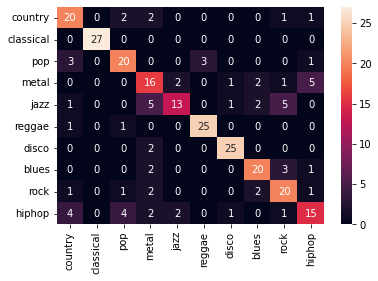


 ***************  Scores on Training Data  *************** 
 
              precision    recall  f1-score   support

     country       0.67      0.77      0.71        26
   classical       1.00      1.00      1.00        27
         pop       0.71      0.74      0.73        27
       metal       0.52      0.59      0.55        27
        jazz       0.76      0.48      0.59        27
      reggae       0.89      0.93      0.91        27
       disco       0.89      0.93      0.91        27
       blues       0.77      0.77      0.77        26
        rock       0.65      0.74      0.69        27
      hiphop       0.62      0.52      0.57        29

    accuracy                           0.74       270
   macro avg       0.75      0.75      0.74       270
weighted avg       0.75      0.74      0.74       270



In [95]:
# Evaluation
class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in class_names] 
print('\n\n The classes are: ')
print(class_names)      
print('\n *************** Confusion Matrix ***************  \n')
# print (confusion_matrix(y_test, predicted))  
sns.heatmap((confusion_matrix(y_test, predicted)),annot=True,
            xticklabels=class_names,
            yticklabels=class_names)
plt.show()    
print('\n ***************  Scores on Training Data  *************** \n ')
print(classification_report(actual_class_labels, predicted_class_labels, target_names=class_names)) 

#### Predict on Test data and Export labels

In [61]:
path = "./music30s_test.csv"
test_df = pd.read_csv(path, delimiter=",")

test_df_numpy = test_df[selected_features_chi2].to_numpy()
test_df_numpy = scaler.fit_transform(test_df_numpy)

features = list(test_df[selected_features_chi2].columns)
test_df = pd.DataFrame(test_df_numpy, columns=features)
test_df

,mfcc9_var,mfcc9_mean,mfcc8_var,mfcc8_mean,mfcc7_var,mfcc7_mean,mfcc6_var,mfcc6_mean,mfcc5_var,mfcc5_mean,...,rolloff_var,rolloff_mean,spectral_bandwidth_var,spectral_bandwidth_mean,spectral_centroid_var,spectral_centroid_mean,rms_var,rms_mean,chroma_stft_var,chroma_stft_mean
0,0.404299,0.737134,0.228131,0.213145,0.745105,0.798371,0.277057,0.355759,0.751786,0.405809,...,0.358641,0.188901,0.326762,0.308429,0.246480,0.177252,0.050489,0.183909,0.656818,0.329507
1,0.135072,0.829382,0.191567,0.217232,0.165146,0.789257,0.103042,0.328654,0.066310,0.794873,...,0.133819,0.095494,0.368507,0.256794,0.037277,0.051192,0.000623,0.000000,0.711546,0.622219
2,0.613867,0.481280,0.517533,1.000000,0.496374,0.484597,0.476012,0.758116,0.874052,0.676969,...,0.282880,0.611093,0.274958,0.607002,0.510081,0.638172,0.327139,1.000000,0.628645,0.673140
3,0.392365,0.945142,0.427488,0.305158,0.207466,0.839135,0.311783,0.426560,0.384891,0.850851,...,1.000000,0.440487,0.626216,0.729691,0.394346,0.330672,0.055743,0.144643,0.894757,0.370960
4,0.446792,0.508214,0.369385,0.328834,0.966547,0.193166,0.166406,0.714581,0.942414,0.395947,...,0.255477,0.454177,0.222909,0.435468,0.376193,0.427353,0.083024,0.201190,0.676003,0.245510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.590417,0.492267,0.618077,0.585357,0.560631,0.341069,0.312567,0.395923,0.675645,0.390258,...,0.403658,0.464699,0.328585,0.461878,0.570542,0.486948,0.146595,0.274861,0.675811,0.374334
96,0.246772,0.191832,0.261002,0.643059,0.275701,0.028573,0.400068,0.414121,0.394567,0.134403,...,0.143019,0.472771,0.124775,0.489646,0.111873,0.460074,0.124319,0.424643,0.571269,0.399430
97,0.565537,0.803309,0.466943,0.342865,0.385687,0.838590,0.262579,0.463214,0.209057,0.663734,...,0.181181,0.896350,0.160542,0.900221,0.361468,0.901520,0.268320,0.741844,0.735103,0.521726
98,0.621988,1.000000,0.832589,0.383435,0.444569,0.747191,0.580498,0.319821,0.867801,0.621728,...,0.189230,1.000000,0.160366,0.996808,0.740728,1.000000,0.808508,0.840391,0.715512,0.608563


In [62]:
pred_labels = svm.predict(test_df)
pred_labels.shape

(100,)

In [63]:
# # exporting output
# file = open("test_data_class_labels.txt", "w")
# np.savetxt(file, pred_labels, fmt='%s')
    
# file.close()

In [65]:
# true_labels = pd.read_csv('actual_labels.csv')
# true_labels

In [66]:
# accuracy = accuracy_score(true_labels, pred_labels)
# print("SVC Accuracy= %.3f"%accuracy)